In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
import cv2 as cv2
from skimage import filters

### project links

In [113]:
# https://colab.research.google.com/drive/10p3hoY3mTWSXeIdbjPNMIbwilLbiSN90?usp=sharing#scrollTo=wahUSCWGxD7L
# https://colab.research.google.com/drive/12s-kTA3GaKIcYf3o8ZkifhhffLaYpn6S?usp=sharing#scrollTo=L688DPEmpHrg
# https://colab.research.google.com/drive/1fx6j6ePzAt_LChzU5-tGqgbzWUwFtxKp?usp=sharing#scrollTo=r8Nv2biGui3u

# Example 

## Open a picture which was made under magnifying glass

In [120]:
i = "ISIC_0001105"
pic2 = plt.imread('../data/example_image/new_dataset/only_melanoma/'+i+'.jpg')

## Convert it to grayscale

(1152, 1536, 3)
115.2


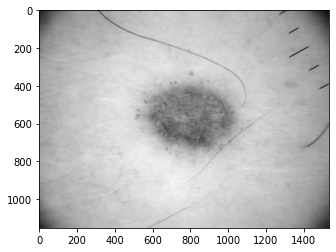

In [121]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(pic2)
plt.imshow(gray, cmap='gray')
print(pic2.shape)
shape = pic2.shape
# calculation 10%
w = pic2.shape[0] * 0.1
h = pic2.shape[1] * 0.07
print(w)

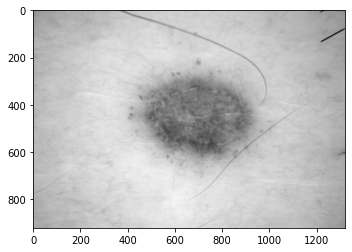

In [122]:
n1 = w
n2 = pic2.shape[0] - w
n3 = h
n4 = pic2.shape[1] - h
im2 = gray[int(n1):int(n2),int(n3):int(n4)]
plt.imshow(im2, cmap='gray')

In [123]:
smallest = np.amin(im2)
biggest = np.amax(im2)
print(smallest)
print(biggest)
dif = biggest-(smallest)
dif = dif-(dif*0.1)
print(dif)


18.813299999999998
177.8098
143.09685


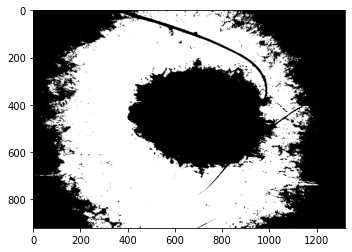

In [124]:
#plt.imshow(gray, cmap='gray')
mymask1 = im2 > dif  #Pixels with higher intensities will be equal to 1 in the mask
plt.imshow(mymask1, cmap='gray')

In [125]:
plt.imsave("mymask1.png",mymask1, cmap='gray')

# Automating masking

In [139]:
pics = pd.read_csv("../data/new_dataset_metadata_raw.csv", sep = ",")
mask = pics["meta.clinical.diagnosis"] == "melanoma"
melanoma_df = pics[mask]
#display(melanoma_df)
df = pd.DataFrame(melanoma_df).set_index('name')
display(df)

,_id,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,meta.clinical.mel_class,...,meta.clinical.sex,meta.acquisition.acquisition_day,meta.acquisition.blurry,meta.acquisition.color_tint,meta.acquisition.dermoscopic_type,meta.acquisition.hairy,meta.acquisition.image_type,meta.acquisition.marker_pen,meta.acquisition.pixelsX,meta.acquisition.pixelsY
name,,,,,,,,,,,,,,,,,,,,,
ISIC_0000002,5436e3acbae478396759f0d3,60.0,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
ISIC_0000004,5436e3acbae478396759f0d7,80.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
ISIC_0000013,5436e3adbae478396759f0e9,30.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767
ISIC_0000022,5436e3aebae478396759f0fb,55.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1504,1129
ISIC_0000026,5436e3aebae478396759f103,30.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1504,1129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0010746,558d63adbae47801cf734ed6,65.0,anterior torso,malignant,6.0,melanoma,histopathology,False,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768
ISIC_0010749,558d63aebae47801cf734edf,80.0,upper extremity,malignant,8.0,melanoma,histopathology,False,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768
ISIC_0010750,558d63aebae47801cf734ee2,80.0,posterior torso,malignant,10.0,melanoma,histopathology,False,NaN,NaN,...,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768


In [133]:
i=melanoma_df[melanoma_df["name"]=="ISIC_0000002"]


melanoma_df.loc[df.index[someRowNumber], 'New Column Title'] = "some value"

                          _id          name  meta.clinical.age_approx  \
295  5436e3acbae478396759f0d3  ISIC_0000002                      60.0   

    meta.clinical.anatom_site_general meta.clinical.benign_malignant  \
295                   upper extremity                      malignant   

     meta.clinical.clin_size_long_diam_mm meta.clinical.diagnosis  \
295                                   NaN                melanoma   

    meta.clinical.diagnosis_confirm_type meta.clinical.family_hx_mm  \
295                       histopathology                        NaN   

     meta.clinical.lesion_id  ...  meta.clinical.sex  \
295                      NaN  ...             female   

     meta.acquisition.acquisition_day  meta.acquisition.blurry  \
295                               NaN                      NaN   

     meta.acquisition.color_tint  meta.acquisition.dermoscopic_type  \
295                          NaN                                NaN   

     meta.acquisition.hairy  meta.acq

In [154]:
display(df)
df.to_csv(index=False)

df.to_csv (r'D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\notebooks\export_dataframe.csv', index = False, header=True)

print (df)

,_id,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,meta.clinical.mel_class,...,meta.acquisition.blurry,meta.acquisition.color_tint,meta.acquisition.dermoscopic_type,meta.acquisition.hairy,meta.acquisition.image_type,meta.acquisition.marker_pen,meta.acquisition.pixelsX,meta.acquisition.pixelsY,n1,n2
name,,,,,,,,,,,,,,,,,,,,,
ISIC_0000002,5436e3acbae478396759f0d3,60.0,upper extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767,1200.0,200.0
ISIC_0000004,5436e3acbae478396759f0d7,80.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767,NaN,NaN
ISIC_0000013,5436e3adbae478396759f0e9,30.0,posterior torso,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1022,767,NaN,NaN
ISIC_0000022,5436e3aebae478396759f0fb,55.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1504,1129,NaN,NaN
ISIC_0000026,5436e3aebae478396759f103,30.0,lower extremity,malignant,NaN,melanoma,histopathology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1504,1129,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0010746,558d63adbae47801cf734ed6,65.0,anterior torso,malignant,6.0,melanoma,histopathology,False,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768,NaN,NaN
ISIC_0010749,558d63aebae47801cf734edf,80.0,upper extremity,malignant,8.0,melanoma,histopathology,False,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768,NaN,NaN
ISIC_0010750,558d63aebae47801cf734ee2,80.0,posterior torso,malignant,10.0,melanoma,histopathology,False,NaN,NaN,...,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024,768,NaN,NaN


                                   _id  meta.clinical.age_approx  \
name                                                               
ISIC_0000002  5436e3acbae478396759f0d3                      60.0   
ISIC_0000004  5436e3acbae478396759f0d7                      80.0   
ISIC_0000013  5436e3adbae478396759f0e9                      30.0   
ISIC_0000022  5436e3aebae478396759f0fb                      55.0   
ISIC_0000026  5436e3aebae478396759f103                      30.0   
...                                ...                       ...   
ISIC_0010746  558d63adbae47801cf734ed6                      65.0   
ISIC_0010749  558d63aebae47801cf734edf                      80.0   
ISIC_0010750  558d63aebae47801cf734ee2                      80.0   
ISIC_0010754  558d63b0bae47801cf734eee                      80.0   
ISIC_0010757  558d63b1bae47801cf734ef7                      40.0   

             meta.clinical.anatom_site_general meta.clinical.benign_malignant  \
name                              

In [156]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for filename in melanoma_df['name']:
    pic2 = plt.imread('../data/example_image/new_dataset/only_melanoma/'+filename+'.jpg')
    gray = rgb2gray(pic2)
    #plt.imshow(gray, cmap='gray')
    # calculation 10%
    w = pic2.shape[0] * 0.1
    h = pic2.shape[1] * 0.07
    #print(w)
    n1 = w
    n2 = pic2.shape[0] - w
    n3 = h
    n4 = pic2.shape[1] - h
    df.loc[filename, ["n1","n2","n3","n4"]] = [n1,n2,n3,n4]
    im2 = gray[int(n1):int(n2),int(n3):int(n4)]
    #plt.imshow(im2, cmap='gray')
    smallest = np.amin(im2)
    biggest = np.amax(im2)
    #print(smallest)
    #print(biggest)
    dif = biggest-(smallest)
    dif = dif-(dif*0.1)
    #print(dif)
    #plt.imshow(gray, cmap='gray')
    mymask1 = im2 > dif  #Pixels with higher intensities will be equal to 1 in the mask
    #plt.imshow(mymask1, cmap='gray')
    plt.imsave('../data/example_image/new_dataset/only_melanoma/'+filename+'_mask''.jpg',mymask1, cmap='gray')

df.to_csv (r'D:\ITU-BOOK\First Year Project\repo\fyp2021p03q10\notebooks\export_dataframe.csv', index = False, header=True)

TypeError: can only concatenate str (not "float") to str

In [ ]:
pics = pd.read_csv("../data/new_dataset_metadata_raw.csv", sep = ",")
mask = pics["meta.clinical.diagnosis"] == "melanoma"
melanoma_df = pics[mask]
display(melanoma_df)

for i,j in zip(melanoma_df['name'],melanoma_df['meta.clinical.diagnosis']):
    original = "D:/ITU-BOOK/First Year Project/repo/fyp2021p03q10/data/example_image/new_dataset/"+i+".jpg"
    target = r'D:/ITU-BOOK/First Year Project/repo/fyp2021p03q10/data/example_image/new_dataset/only_melanoma'
    shutil.copy(original, target)
    print(i,j)

## Apply two different masks

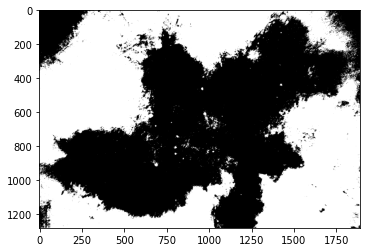

In [76]:
#plt.imshow(gray, cmap='gray')
mymask1 = im2 > dif  #Pixels with higher intensities will be equal to 1 in the mask
mymask2 = im2 < 130  #Pixels with lower intensities will be equal to 1 in the mask
plt.imshow(mymask1, cmap='gray')
#plt.imshow(mymask2, cmap='gray')

(667, 800)
(567, 700)


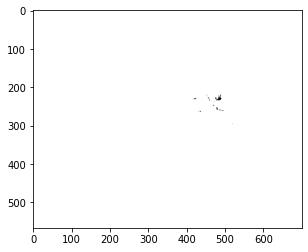

In [32]:
# get shape
mymask1.shape
print(mymask1.shape)

im2 = mymask1[100:800,100:1022]
plt.imshow(im2, cmap='gray')
print(im2.shape)

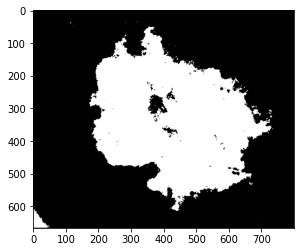

In [33]:
plt.imshow(mymask2, cmap='gray')

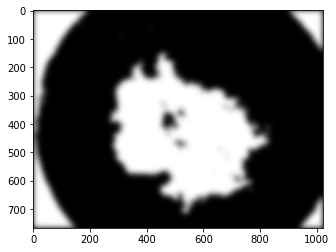

In [182]:
blurred = filters.gaussian(mymask2,sigma=10)

plt.imshow(blurred, cmap='gray')

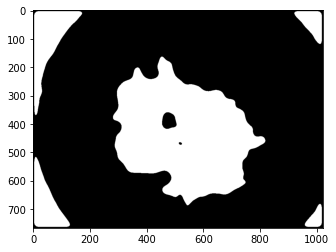

In [195]:
mask2 = blurred > 0.6
plt.imshow(mask2, cmap='gray')

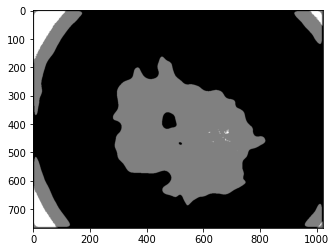

In [202]:
final_mask = (255-mymask1)-(255-mask2)
plt.imshow(final_mask, cmap='gray')

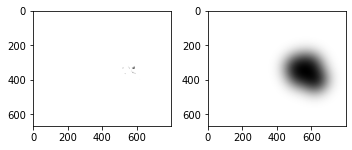

In [35]:
struct_el = morphology.disk(70)

#print(struct_el)
mask_eroded = morphology.binary_erosion(mymask1, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mymask1, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

blurred = filters.gaussian(mask_eroded,sigma=40)

plt.imshow(blurred, cmap='gray')

# Verify it's smaller
#print(area)
#print(np.sum(mask_eroded))

In [36]:
#plt.imshow(mymask1, cmap='gray')
final_mask = (255-mymask1) + (255-mymask2)
final_mask = mymask1+(255-mask2)
final_mask_er = (255-blurred) + (255-mymask2)
#plt.imshow(final_mask, cmap='gray')

NameError: name 'mask2' is not defined

NameError: name 'final_mask' is not defined

<Figure size 432x288 with 0 Axes>

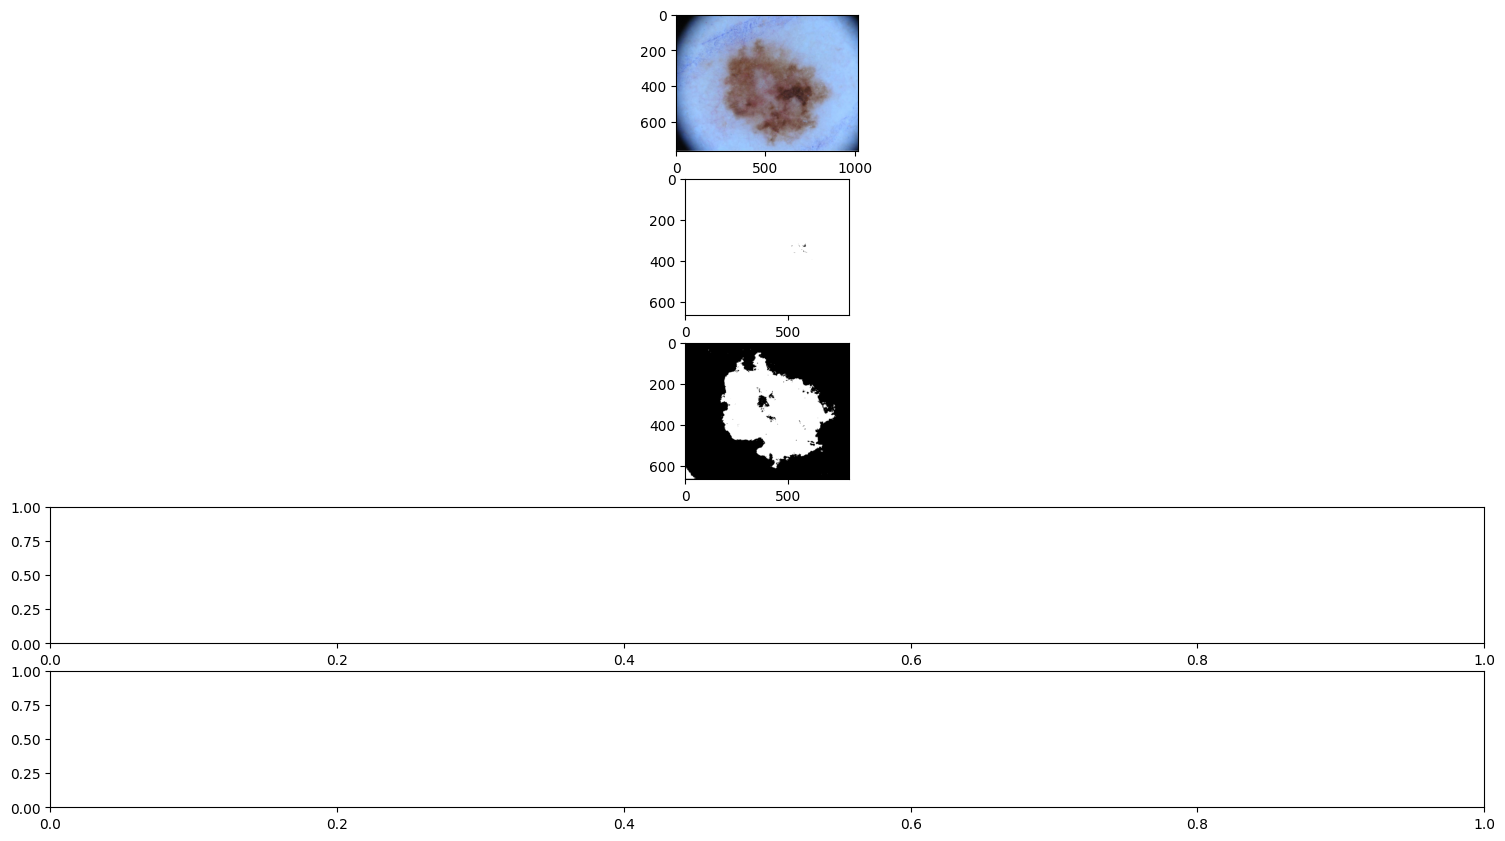

In [34]:
plt.figure()
#figure(figsize=(4, 1), dpi=80)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,1, dpi=100)
f.set_size_inches(18.5, 10.5)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(pic2, cmap='gray')
axarr[1].imshow(mymask1,cmap='gray')
axarr[2].imshow(mymask2,cmap='gray')
axarr[3].imshow(final_mask,cmap='gray')
axarr[4].imshow(final_mask_er,cmap='gray')